In [ ]:
#importing libraries

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#loading the data

#total 70000
# 60000 training data
# 10000 testing data

#x - Data (images)
#y - labels 

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

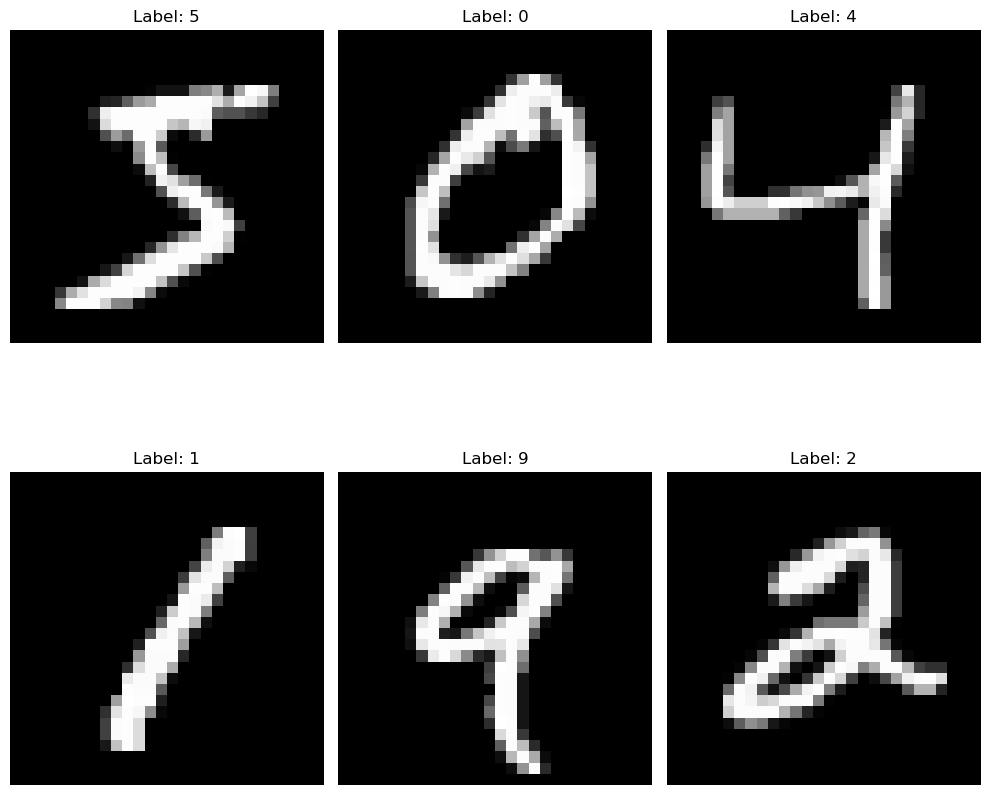

In [ ]:
# visualize the input data
# Display 4 sample images from the training set
plt.figure(figsize=(10, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Turn off the axes

plt.tight_layout()
plt.show()

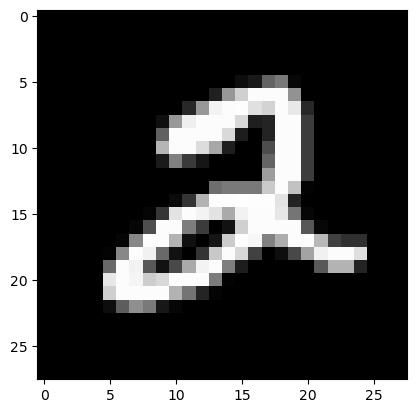

In [ ]:
plt.imshow(x_train[5], cmap='gray')


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<Axes: >

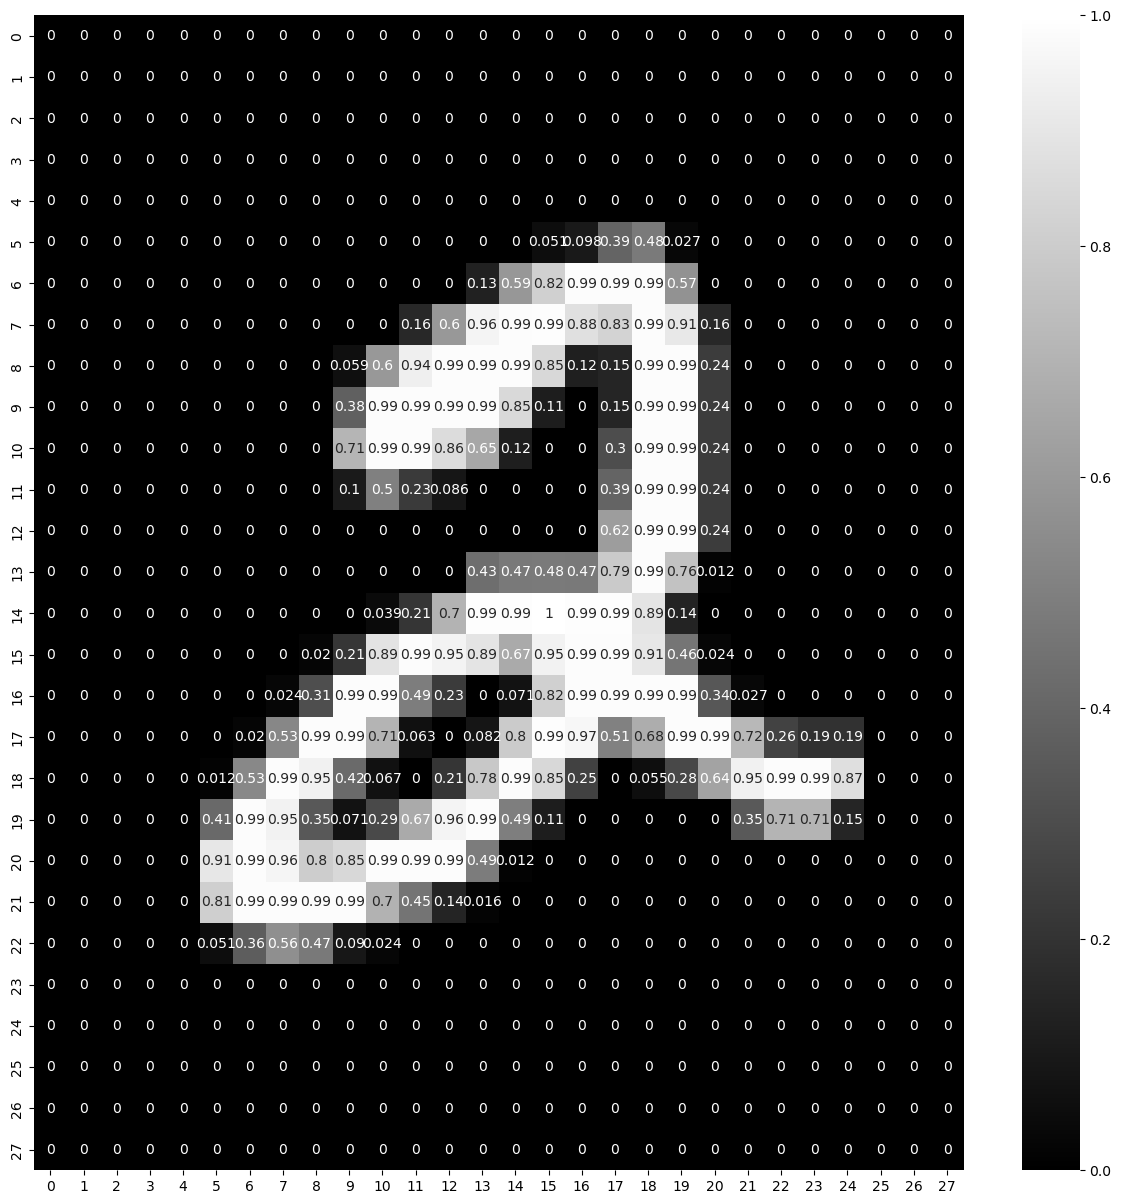

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[5],cmap='gray',annot=True)

## MODEL CREATION

## CNN

In [ ]:
# Build the model
model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


c:\Users\hp\.ms-ad\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.7973 - loss: 0.6526 - val_accuracy: 0.9771 - val_loss: 0.0712
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9594 - loss: 0.1302 - val_accuracy: 0.9803 - val_loss: 0.0631
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9709 - loss: 0.0923 - val_accuracy: 0.9853 - val_loss: 0.0482
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9747 - loss: 0.0817 - val_accuracy: 0.9873 - val_loss: 0.0426
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9798 - loss: 0.0654 - val_accuracy: 0.9869 - val_loss: 0.0420
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9798 - loss: 0.0628 - val_accuracy: 0.9865 - val_loss: 0.0439
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9815 - loss: 0.0564 - val_accuracy: 0.9891 - val_loss: 0.0377
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9847 - loss: 0.0501 - 

In [ ]:
# Evaluate the model on the test set

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9879 - loss: 0.0429
Test Accuracy: 0.9898999929428101


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


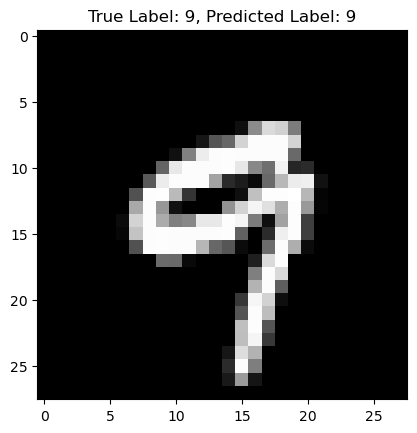

In [ ]:
# for visualizing a sample from the test data to review our model


# Select a random sample from the test data
index = np.random.randint(0, len(x_test))     #len(x_test) = 10000
image = x_test[index]
true_label = np.argmax(y_test[index])




# Predict the class using the model
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction)


# Display the image and the prediction
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_class}")
plt.show()

## PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the images into 1D arrays
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert one-hot encoded labels to 1D class indices
y_train_1d = np.argmax(y_train, axis=1)  # Convert y_train to 1D class indices
y_test_1d = np.argmax(y_test, axis=1)    # Convert y_test to 1D class indices


# Split the data into training and validation sets
x_train_resampled, x_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    x_train_flat, y_train_1d, test_size=0.2, random_state=42
)

## SVM

In [16]:
# Create and train the SVM model
svm_model = svm.SVC(kernel='rbf')  # SVC - Support Vector Classifier, RBF - Radial Basis Function
svm_model.fit(x_train_resampled, y_train_resampled)

# Validate on the validation set
y_pred_val_svm = svm_model.predict(x_val_resampled)
print(f'SVM Validation Accuracy: {accuracy_score(y_val_resampled, y_pred_val_svm)}')

# Ensure y_test and y_pred_test_svm are in the correct format
# Predict on the test set
y_pred_test_svm = svm_model.predict(x_test_flat)

# Convert y_test to single-label format if one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Convert y_pred_test_svm to single-label format if necessary
if len(y_pred_test_svm.shape) > 1 and y_pred_test_svm.shape[1] > 1:
    y_pred_test_svm = np.argmax(y_pred_test_svm, axis=1)

# Verify consistency
print(f"y_test shape: {y_test.shape}, unique values: {np.unique(y_test)}")
print(f"y_pred_test_svm shape: {y_pred_test_svm.shape}, unique values: {np.unique(y_pred_test_svm)}")

# Calculate and print test accuracy
print(f'SVM Test Accuracy: {accuracy_score(y_test, y_pred_test_svm)}')


In [ ]:
import matplotlib.pyplot as plt

accuracies = [0.85, 0.88]  # Example validation and test accuracies
labels = ['Validation Accuracy', 'Test Accuracy']

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('SVM Model Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:


# Function to visualize predictions
def visualize_predictions(data, true_labels, predicted_labels, num_samples=10):
    """
    Visualize a few samples with their true and predicted labels.
    """
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(data[i].reshape(28, 28), cmap='gray')  # Reshape if data is flattened
        plt.title(f"True Label: {true_labels[i]}\nPredicted Label: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()





In [ ]:
# Predict using the trained SVM model
y_pred_test_svm = svm_model.predict(x_test_flat)



In [ ]:
# Visualize predictions on the first 5 test samples
visualize_predictions(x_test_flat[5:15], y_test_1d[5:15], y_pred_test_svm[5:15])



## KNN

In [ ]:
# Create and train the SVM model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_resampled, y_train_resampled)

# Validate on the validation set
y_pred_val_knn = knn_model.predict(x_val_resampled)
print(f'KNN Validation Accuracy: {accuracy_score(y_val_resampled, y_pred_val_knn)}')

# Test on the test set
y_pred_test_knn = knn_model.predict(x_test_flat)
print(f'KNN Test Accuracy: {accuracy_score(y_test, y_pred_test_knn)}')


In [ ]:
# Calculate Training Accuracy
y_pred_train_knn = knn_model.predict(x_train_resampled)
training_accuracy_knn = accuracy_score(y_train_resampled, y_pred_train_knn)
print(f'KNN Training Accuracy: {training_accuracy_knn}')

In [ ]:


# Function to visualize predictions
def visualize_predictions(data, true_labels, predicted_labels, num_samples=5):
    """
    Visualize a few samples with their true and predicted labels.
    """
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(data[i].reshape(28, 28), cmap='gray')  # Reshape if data is flattened
        plt.title(f"True Label: {true_labels[i]}\nPredicted Label: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Predict using the trained KNN model
y_pred_test_knn = knn_model.predict(x_test_flat)

# Ensure y_test is in the correct format if one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_1d = np.argmax(y_test, axis=1)
else:
    y_test_1d = y_test

# Visualize predictions on the first 5 test samples
visualize_predictions(x_test_flat[5:10], y_test_1d[5:10], y_pred_test_knn[5:10])


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_resampled, y_train_resampled)

# Calculate Training Accuracy
y_pred_train_dt = dt_model.predict(x_train_resampled)
training_accuracy_dt = accuracy_score(y_train_resampled, y_pred_train_dt)
print(f'Decision Tree Training Accuracy: {training_accuracy_dt}')

# Validate on the validation set
y_pred_val_dt = dt_model.predict(x_val_resampled)
validation_accuracy_dt = accuracy_score(y_val_resampled, y_pred_val_dt)
print(f'Decision Tree Validation Accuracy: {validation_accuracy_dt}')


# Test on the test set
y_pred_test_dt = dt_model.predict(x_test_flat)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
print(f'Decision Tree Test Accuracy: {test_accuracy_dt}')
